# ゼロから作るdeeplearning 3章 ニューラルネットワーク

## 3.2 活性化関数
非線形であることが大事。
もし線形だったら層を複数重ねる意味がなくなってしまう

In [35]:
import numpy as np
import matplotlib.pyplot as plt

### シグモイド関数

In [36]:
def sigmoid(x):
	return 1 / (1 + np.exp(-x))

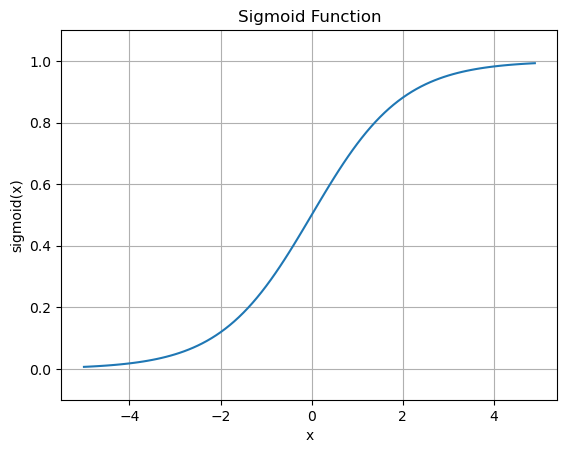

In [37]:
# 図示してみる
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.grid(True)
plt.show()

### ステップ関数

In [38]:
def step_function(x):
	return np.array(x > 0, dtype=int)

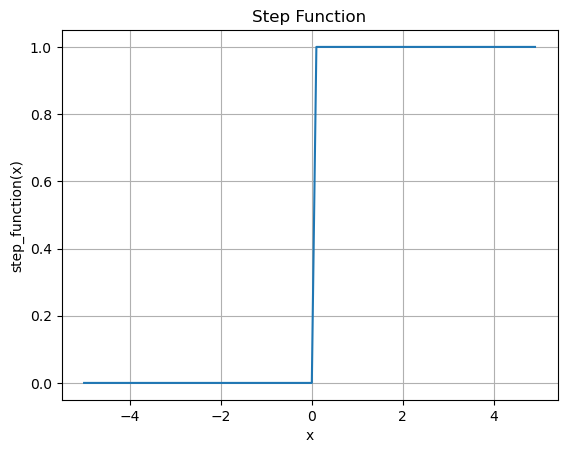

In [39]:
# 図示してみる
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.title("Step Function")
plt.xlabel("x")
plt.ylabel("step_function(x)")
plt.grid(True)
plt.show()

### ReLU関数（Rectified Linear Unit）
rectified : 誤りを矯正する

modified : 単に変更を表す。何も問題がない時の改善、改良の意味の時もある

In [40]:
def relu(x):
	return np.maximum(0, x)

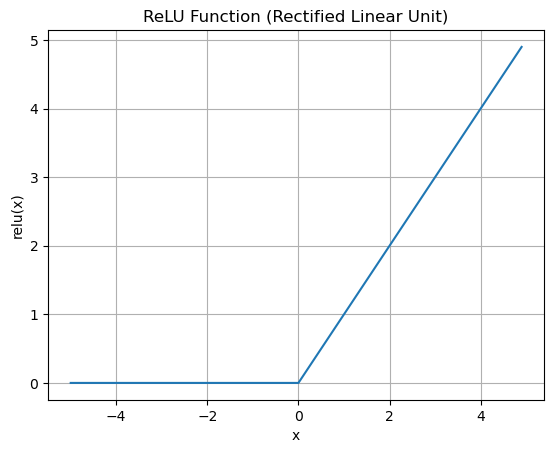

In [41]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.title("ReLU Function (Rectified Linear Unit)")
plt.xlabel("x")
plt.ylabel("relu(x)")
plt.grid(True)
plt.show()

## 3層ネットワークを実装してみよう！
(入力層)→(1層)→(2層)→(出力層)

(2次元)→(3次元)→(2次元)→(2次元)

In [42]:
def init_network():
	network = {}
	network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
	network['b1'] = np.array([0.1, 0.2, 0.3])
	network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
	network['b2'] = np.array([0.1, 0.2])
	network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
	network['b3'] = np.array([0.1, 0.2])
	return network

def forward(network, x):
	W1, W2, W3 = network['W1'], network['W2'], network['W3']
	b1, b2, b3 = network['b1'], network['b2'], network['b3']

	a1 = np.dot(x, W1) + b1
	z1 = sigmoid(a1)
	a2 = np.dot(z1, W2) + b2
	z2 = sigmoid(a2)
	a3 = np.dot(z2, W3) + b3
	y = a3

	return y

## ソフトマックス関数：0~1の確率分布に変換！

ソフトマックス関数は、与えられた入力ベクトルの各要素に対して以下の計算を行います。

### 定義

与えられた入力ベクトル $\mathbf{z} = [z_1, z_2, \ldots, z_K]$ に対して、ソフトマックス関数は次のように定義されます。

$$
\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

ここで、 $\sigma(\mathbf{z})_i$ は入力ベクトル $\mathbf{z}$ の $i$ 番目の要素に対するソフトマックス関数の出力です。

### 例

例えば、入力ベクトル $\mathbf{z} = [2.0, 1.0, 0.1]$ に対して、ソフトマックス関数を適用すると次のようになります。

1. 各要素に対して指数関数を適用します：
   $$
   e^{2.0} \approx 7.389, \quad e^{1.0} \approx 2.718, \quad e^{0.1} \approx 1.105
   $$

2. これらの値の合計を計算します：
   $$
   7.389 + 2.718 + 1.105 \approx 11.212
   $$

3. 各指数関数の値を合計で割ります：
   $$
   \sigma(\mathbf{z})_1 = \frac{7.389}{11.212} \approx 0.659, \quad \sigma(\mathbf{z})_2 = \frac{2.718}{11.212} \approx 0.242, \quad \sigma(\mathbf{z})_3 = \frac{1.105}{11.212} \approx 0.099
   $$

したがって、ソフトマックス関数の出力は次のようになります：
$$
\sigma(\mathbf{z}) \approx [0.659, 0.242, 0.099]
$$


In [50]:
# オーバーフロー対策済みのsoftmax関数
def softmax(a):
	c = np.max(a)
	exp_a = np.exp(a - c) # オーバーフロー対策で最大値を引く
	sum_exp_a = np.sum(exp_a)
	y = exp_a / sum_exp_a
	return y

ソフトマックス関数は、指数関数を用いるため、入力値が非常に大きい場合にオーバーフローの問題が生じることがあります。このオーバーフローを防ぐために、入力ベクトルに定数を引くことがよく行われます。ここでは、入力ベクトルの各要素から定数を引いてもソフトマックス関数の出力が変わらないことを式変換を用いて証明します。

### ソフトマックス関数の定義

まず、ソフトマックス関数の定義を再確認します。

$$
\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

### 入力ベクトルに定数を引いた場合

入力ベクトル $\mathbf{z}$ の各要素から定数 $c$ を引いた場合を考えます。新しい入力ベクトルを $\mathbf{z'} = \mathbf{z} - c$ とします。このとき、各要素は $z'_i = z_i - c$ です。

ソフトマックス関数を新しい入力ベクトル $\mathbf{z'}$ に適用すると、次のようになります。

$$
\sigma(\mathbf{z'})_i = \frac{e^{z'_i}}{\sum_{j=1}^{K} e^{z'_j}}
$$

これを具体的に展開すると、

$$
\sigma(\mathbf{z'})_i = \frac{e^{z_i - c}}{\sum_{j=1}^{K} e^{z_j - c}}
$$

### 指数関数の性質を利用

指数関数の性質 $e^{a - b} = \frac{e^a}{e^b}$ を用いると、

$$
\sigma(\mathbf{z'})_i = \frac{e^{z_i} \cdot e^{-c}}{\sum_{j=1}^{K} e^{z_j} \cdot e^{-c}}
$$

分母と分子の両方に $e^{-c}$ が含まれているので、これを取り出します。

$$
\sigma(\mathbf{z'})_i = \frac{e^{-c} \cdot e^{z_i}}{e^{-c} \cdot \sum_{j=1}^{K} e^{z_j}}
$$

分母と分子の $e^{-c}$ は相殺されます。

$$
\sigma(\mathbf{z'})_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

### 結論

よって、入力ベクトルの各要素から定数 $c$ を引いてもソフトマックス関数の出力は変わりません。

$$
\sigma(\mathbf{z'})_i = \sigma(\mathbf{z})_i
$$

この証明により、ソフトマックス関数に定数を引くことがオーバーフロー対策として有効であり、出力結果に影響を与えないことが示されました。

In [49]:
x = np.array([0.3, 2.9, 4.0])
y = softmax(x)
print(y)
np.sum(y) # softmax関数の出力の総和は1になる

[0.01821127 0.24519181 0.73659691]


1.0

分類問題では最終的に1番確率の高いクラスを選択する。softmax関数を適用しても確率の大小が入れ替わるわけではないので、出力層のsoftmaax関数は一般に省略される。

## 手書き文字認識
### MNISTの手書き文字をインポート

In [57]:
import tensorflow as tf

# TensorFlowのデータセットAPIを使ってMNISTデータセットを読み込む
mnist = tf.keras.datasets.mnist

# データセットを訓練データとテストデータに分割
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# flatten処理を適用して、28x28の画像を1次元配列（784次元）に変換
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

print("訓練データの形状:", x_train.shape)
print("訓練ラベルの形状:", y_train.shape)
print("テストデータの形状:", x_test.shape)
print("テストラベルの形状:", y_test.shape)


訓練データの形状: (60000, 784)
訓練ラベルの形状: (60000,)
テストデータの形状: (10000, 784)
テストラベルの形状: (10000,)


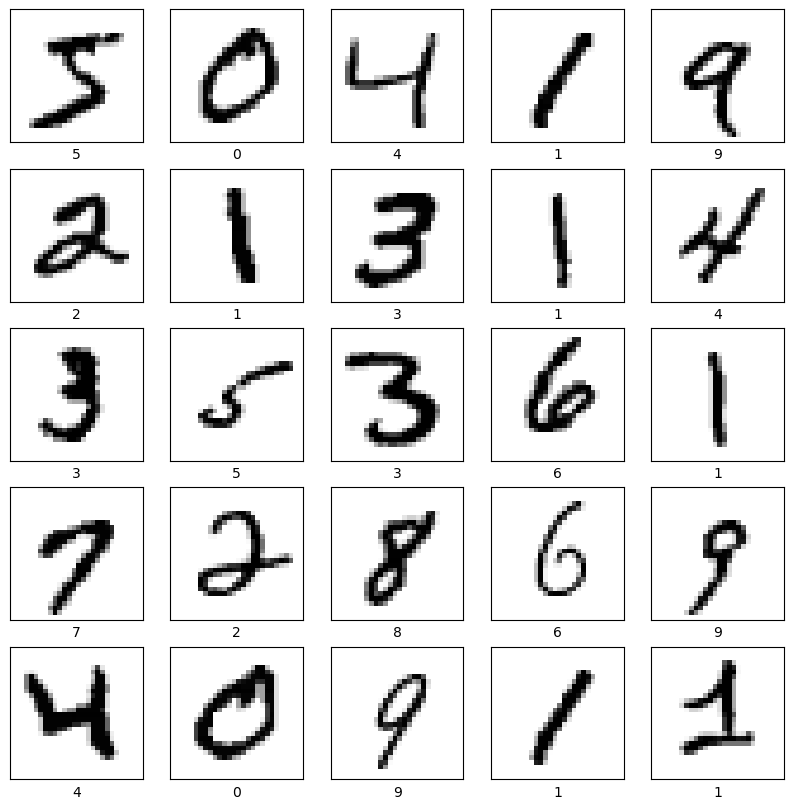

In [61]:
# MNIST画像を表示させてみる
# 最初の25個のflatten処理後の訓練データを表示する（元の形状に戻してから表示）
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # 元の形状に戻してから表示
    plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [65]:
# 今回ネットワークはランダムに定義
def init_network():
	network = {}
	network['W1'] = np.random.randn(784, 50)
	network['b1'] = np.random.randn(50)
	network['W2'] = np.random.randn(50, 100)
	network['b2'] = np.random.randn(100)
	network['W3'] = np.random.randn(100, 10)
	network['b3'] = np.random.randn(10)
	
	return network

def predict(network, x):
	W1, W2, W3 = network['W1'], network['W2'], network['W3']
	b1, b2, b3 = network['b1'], network['b2'], network['b3']
	
	a1 = np.dot(x, W1) + b1
	z1 = sigmoid(a1)
	a2 = np.dot(z1, W2) + b2
	z2 = sigmoid(a2)
	a3 = np.dot(z2, W3) + b3
	y = softmax(a3)
	
	return y

In [66]:
x, t = x_train, y_train
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
	y = predict(network, x[i])
	p = np.argmax(y)
	if p == t[i]:
		accuracy_cnt += 1
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

/var/folders/5k/0bfc6pzn3z9_z6xn1rvv40sr0000gn/T/ipykernel_44995/2305987207.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy:0.12123333333333333


### バッチ処理で複数枚の推論を一気にこなす（コンピュータ的にこの方が速い）

In [67]:
# バッチ処理
x, t = x_train, y_train
network = init_network()

batch_size = 100
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
	x_batch = x[i:i+batch_size]
	y_batch = predict(network, x_batch)
	p = np.argmax(y_batch, axis=1)
	accuracy_cnt += np.sum(p == t[i:i+batch_size])
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

/var/folders/5k/0bfc6pzn3z9_z6xn1rvv40sr0000gn/T/ipykernel_44995/2305987207.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy:0.09265
